In [1]:
import numpy as np
import pandas as pd
import os
import pylab as pl
import json
from __future__ import print_function, division
import statsmodels.api as sm
import statsmodels.formula.api as smf

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)

In [3]:
def line(a,x,b=0):
    '''
    creates a line from parameters and exogenous (independent) variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

In [4]:
np.random.seed(123)

## Part 1

In [5]:
x = np.arange(10,100,10)

x

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [6]:
x_error = errors(x)

x_error

array([ 3.16227766,  4.47213595,  5.47722558,  6.32455532,  7.07106781,
        7.74596669,  8.36660027,  8.94427191,  9.48683298])

In [7]:
y = line(0.5,x)

y

array([  7.36606553,  17.19428472,  13.51987623,  25.13769768,
        28.53369645,  33.67427837,  30.28187388,  31.0796856 ,  34.56407472])

In [8]:
y_error = errors(y)

y_error

array([ 2.71404966,  4.14659918,  3.67693843,  5.01375086,  5.34169416,
        5.80295428,  5.50289686,  5.57491575,  5.87912193])

Text(0,0.5,'Endogenous Variable')

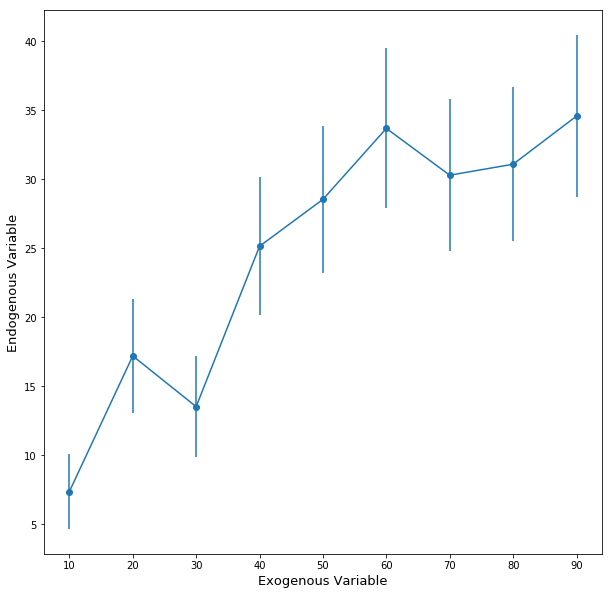

In [20]:
fig, ax = subplots(figsize = (10,10))

ax.scatter(x,y)
ax.errorbar(x,y,yerr=y_error)
ax.set_xlabel('Exogenous Variable',fontsize=13)
ax.set_ylabel('Endogenous Variable',fontsize=13)

Fig 1: The figure above shows the points for x and y (which is a function of x).  Error bars were added for y, to indicate the error inherent in the function.

## Part 2

In [17]:
xmat = sm.add_constant(x)

print("This is the x array after adding the add_constant() function: ")
print(xmat)
print("This is the x array:")
print(x)
print("This is the y array:")
print(y)

This is the x array after adding the add_constant() function: 
[[  1.  10.]
 [  1.  20.]
 [  1.  30.]
 [  1.  40.]
 [  1.  50.]
 [  1.  60.]
 [  1.  70.]
 [  1.  80.]
 [  1.  90.]]
This is the x array:
[10 20 30 40 50 60 70 80 90]
This is the y array:
[  7.36606553  17.19428472  13.51987623  25.13769768  28.53369645
  33.67427837  30.28187388  31.0796856   34.56407472]


## Part 3

In [21]:
# THE WRONG WAY

smfit_1 = smf.OLS(y, x).fit()
smfit_1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           9.66e-07
Time:                        19:41:41   Log-Likelihood:                -28.029
No. Observations:                   9   AIC:                             58.06
Df Residuals:                       8   BIC:                             58.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4559      0.034     13.317      0.000         0.377     0.535
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                0.887
Skew:                          -0.368   Prob(JB):                        0.642
Kurtosis:                       1.650   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# THE RIGHT WAY

smfit_2 = smf.OLS(y, xmat).fit()
smfit_2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     33.62
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000665
Time:                        19:41:43   Log-Likelihood:                -24.739
No. Observations:                   9   AIC:                             53.48
Df Residuals:                       7   BIC:                             53.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.5522      3.114      2.746      0.029         1.189    15.916
x1             0.3208      0.055      5.798      0.001         0.190     0.452
==============================================================================
Omnibus:                        2.931   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                0.952
Skew:                           0.178   Prob(JB):                        0.621
Kurtosis:                       1.447   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4

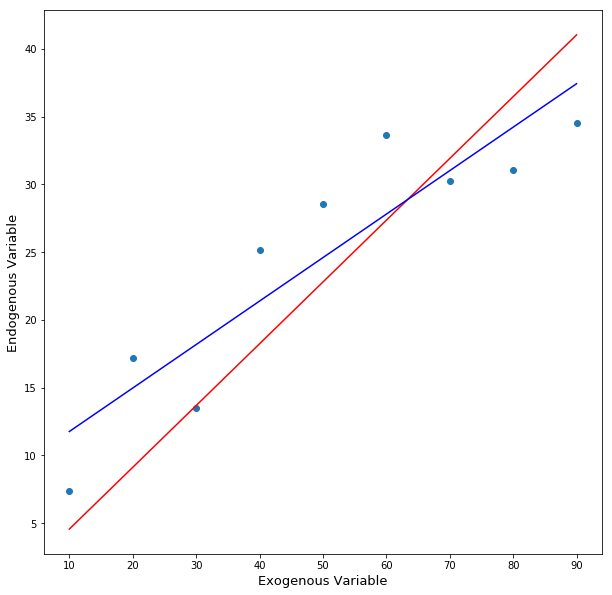

In [70]:
# Plot using the both methods


fig, ax = subplots(figsize = (10,10))

ax.scatter(x,y)
ax.plot(x,smfit_1.predict(x), color='r')
ax.plot(x,smfit_2.predict(xmat), color='b')
ax.set_xlabel('Exogenous Variable',fontsize=13)
ax.set_ylabel('Endogenous Variable',fontsize=13)
ax.legend();  # Calling the legend not working for some reason

Fig 2:  The above plot shows the x and y values as points on the Cartesian plane.  In additition, there are two lines: 1) an incorrect application of the statsmodels function (in red) and,
2) the correct application of the statsmodels function (in blue)

## Part 5

In [35]:
x_new = np.arange(10,100,10)

x_new

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [36]:
x_new_error = errors(x_new)

x_new_error

array([ 3.16227766,  4.47213595,  5.47722558,  6.32455532,  7.07106781,
        7.74596669,  8.36660027,  8.94427191,  9.48683298])

In [38]:
y_new = line(0.5,x_new,b=50*0.5)

y_new

array([ 29.74517348,  37.64170957,  40.63151711,  45.18747832,
        70.92064116,  54.95251753,  58.66765899,  63.91373002,  64.46408463])

In [39]:
y_new_error = errors(y_new)

y_new_error

array([ 5.45391359,  6.13528398,  6.37428562,  6.72216322,  8.42143938,
        7.41299653,  7.65948164,  7.99460631,  8.0289529 ])

Text(0,0.5,'Endogenous Variable')

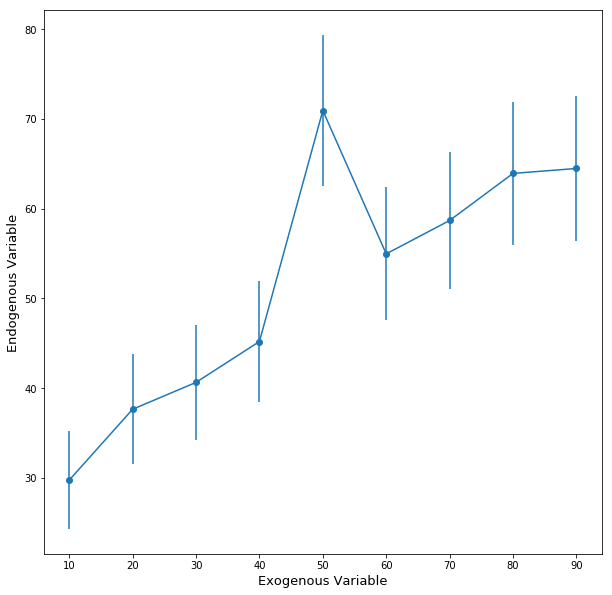

In [40]:
fig, ax = subplots(figsize = (10,10))

ax.scatter(x_new,y_new)
ax.errorbar(x_new,y_new,yerr=y_new_error)
ax.set_xlabel('Exogenous Variable',fontsize=13)
ax.set_ylabel('Endogenous Variable',fontsize=13)

In [41]:
x_new_mat = sm.add_constant(x)

print("This is the x array after adding the add_constant() function: ")
print(x_new_mat)
print("This is the x array:")
print(x_new)
print("This is the y array:")
print(y_new)

This is the x array after adding the add_constant() function: 
[[  1.  10.]
 [  1.  20.]
 [  1.  30.]
 [  1.  40.]
 [  1.  50.]
 [  1.  60.]
 [  1.  70.]
 [  1.  80.]
 [  1.  90.]]
This is the x array:
[10 20 30 40 50 60 70 80 90]
This is the y array:
[ 29.74517348  37.64170957  40.63151711  45.18747832  70.92064116
  54.95251753  58.66765899  63.91373002  64.46408463]


## Part 6

In [42]:
# THE WRONG WAY

smfit_3 = smf.OLS(y_new, x_new).fit()
smfit_3.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     89.37
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.29e-05
Time:                        20:05:06   Log-Likelihood:                -37.336
No. Observations:                   9   AIC:                             76.67
Df Residuals:                       8   BIC:                             76.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9102      0.096      9.453      0.000         0.688     1.132
==============================================================================
Omnibus:                        1.130   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                0.685
Skew:                          -0.241   Prob(JB):                        0.710
Kurtosis:                       1.738   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# THE RIGHT WAY

smfit_4 = smf.OLS(y_new, x_new_mat).fit()
smfit_4.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     18.94
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00334
Time:                        20:05:39   Log-Likelihood:                -30.146
No. Observations:                   9   AIC:                             64.29
Df Residuals:                       7   BIC:                             64.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         29.8309      5.679      5.253      0.001        16.403    43.259
x1             0.4392      0.101      4.352      0.003         0.201     0.678
==============================================================================
Omnibus:                       22.994   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.846
Skew:                           2.292   Prob(JB):                      0.00162
Kurtosis:                       6.639   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#smf.WLS?

In [58]:
x_weights = 1/x_new_error

In [65]:
# Using the Weighted Least Squares model 

wls_model = smf.WLS(y_new,x_new_mat, weights=x_weights)
wls_model_fit = wls_model.fit()

wls_model_fit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            WLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     26.09
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00139
Time:                        20:21:48   Log-Likelihood:                -29.804
No. Observations:                   9   AIC:                             63.61
Df Residuals:                       7   BIC:                             64.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         27.7709      4.541      6.115      0.000        17.032    38.509
x1             0.4774      0.093      5.107      0.001         0.256     0.698
==============================================================================
Omnibus:                       21.991   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.951
Skew:                           2.228   Prob(JB):                      0.00254
Kurtosis:                       6.465   Cond. No.                         90.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Extra

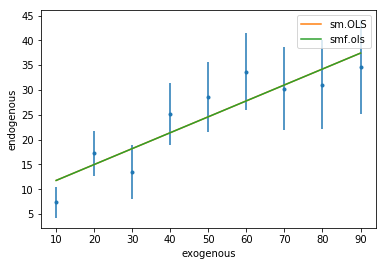

In [69]:
# Calling the smf function in order to compare methods

smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_2.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend(loc=0);